#### Named Entity Recognition

In [ ]:
#!pip install spacy
#!pip install wordcloud

In [ ]:
###Execute below command through anaconda command prompt
#!python -m spacy download en

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
#from wordcloud import WordCloud
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving apple.txt to apple.txt


In [6]:
book=pd.read_csv("apple.txt",skip_blank_lines=False,on_bad_lines='skip')

In [7]:
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [8]:
##Part Of Speech Tagging
#nlp = spacy.load('en')
!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 49.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
one_block = book[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

https://spacy.io/usage/visualizers

In [ ]:
one_block

"Best Laptop under 60k. If you don't want any accounting softwares like tally or busy then go for it, better than windows in every term. I just love it's battery life with sleek look 😍Now talking about MS officeIt's available on app store, free for 1 monthAfter that you will have to pay.You cannot install pirated version but if you install Windows 7 or any other version then u can use Ms office for freeBut in MacBook there are other apps which are good substitute for Ms office appsNumbers for ExcelPages for wordKeynote for PowerPointAnd you can convert your numbers file to Excel file or csv fileSame for the pages & keynoteSo no need of Ms office for me.Cons1. U cannot play games, your laptop will just heat up, battery will drain* U cannot play pubg mobile on emulator if you are pubg lover😁2. Storage 128gb, it will work fine but if you want to store movies or TV shows u can't, u have to buy external hard disk"

In [ ]:
for token in doc_block[0:50]:
    print(token, token.pos_)

Best ADJ
Laptop PROPN
under ADP
60k NOUN
. PUNCT
If SCONJ
you PRON
do AUX
n't PART
want VERB
any DET
accounting NOUN
softwares NOUN
like ADP
tally NOUN
or CCONJ
busy ADJ
then ADV
go VERB
for ADP
it PRON
, PUNCT
better ADJ
than ADP
windows NOUN
in ADP
every DET
term NOUN
. PUNCT
I PRON
just ADV
love VERB
it PRON
's AUX
battery NOUN
life NOUN
with ADP
sleek ADJ
look NOUN
😍 PROPN
Now ADV
talking VERB
about ADP
MS PROPN
officeIt PROPN
's PART
available ADJ
on ADP
app NOUN
store NOUN


In [ ]:
#Filtering for nouns and verbs only
nouns = [token.text for token in doc_block if token.pos_ in ('NOUN')]
print(nouns)

['60k', 'accounting', 'softwares', 'tally', 'windows', 'term', 'battery', 'life', 'look', 'app', 'store', 'version', 'version', 'office', 'apps', 'substitute', 'office', 'appsNumbers', 'wordKeynote', 'numbers', 'file', 'fileSame', 'pages', 'need', 'office', 'Cons1', 'games', 'laptop', 'battery', '*', 'mobile', 'emulator', 'Storage', 'gb', 'movies', 'TV', 'disk']


In [ ]:
verbs = [token.text for token in doc_block if token.pos_ in ('VERB')]
print(verbs)

['want', 'go', 'love', 'talking', 'have', 'pay', 'install', 'pirated', 'install', 'use', 'are', 'convert', 'file', 'play', 'heat', 'drain', 'play', 'work', 'want', 'store', 'shows', 'have', 'buy']


In [ ]:
adjectives = [token.text for token in doc_block if token.pos_ in ('ADJ')]
print(adjectives)

['Best', 'busy', 'better', 'sleek', 'available', 'free', 'other', 'other', 'good', 'csv', 'external', 'hard']


In [ ]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

In [ ]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#### Emotion Mining

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [12]:
from google.colab import files
uploaded = files.upload()

Saving Afinn.csv to Afinn.csv


In [13]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [14]:
afinn.head(50)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [15]:
from google.colab import files
uploaded = files.upload()

In [16]:
book=pd.read_csv("apple.txt",skip_blank_lines=False,on_bad_lines='skip')
book
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False

In [17]:
book

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[0:5]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders Finally a MacBook possession.",
 'Got it in 50k in Diwali sale.',
 'Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better.',
 'Terrific sense of possession & pride.Bad News.',
 'Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !']

In [20]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
183,You can get one of the best movie experiences ...
184,Overall I would it a 4.5/5.
185,"I got a great deal on this laptop, which I hav..."
186,I got it not only on discount but also was abl...


In [21]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [28]:
#Custom function :score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [24]:
text = "I love reading & it gives me lots of knowledge"
sentence = nlp(text)
for i in sentence:
  print(i, i.lemma_)

I I
love love
reading read
& &
it it
gives give
me I
lots lot
of of
knowledge knowledge


In [29]:
# test that it works
#calculate_sentiment(text = 'I want to learn to swim, but I am scared I will drown')
#calculate_sentiment(text = 'I want to learn to swim, because I enjoy it')
calculate_sentiment(text = 'Python coding is very interesting and easy, but requires lot of time')

3

In [30]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df

,sentence,sentiment_value
0,It's amazing..... battery last around 10 -12 h...,7
1,Got it in 50k in Diwali sale.,0
2,Technically good laptop.Good News.luxury produ...,5
3,Terrific sense of possession & pride.Bad News.,4
4,Problems will be there if you are switching fr...,-11
...,...,...
183,You can get one of the best movie experiences ...,3
184,Overall I would it a 4.5/5.,0
185,"I got a great deal on this laptop, which I hav...",3
186,I got it not only on discount but also was abl...,0


In [31]:
sentiment = []
for i in sent_df['sentiment_value']:
  if i>0:
    sentiment.append('Positive')
  elif i<0:
    sentiment.append('Negative')
  else:
    sentiment.append('Neutral')
sent_df['sentiment']=sentiment

In [32]:
sent_df

,sentence,sentiment_value,sentiment
0,It's amazing..... battery last around 10 -12 h...,7,Positive
1,Got it in 50k in Diwali sale.,0,Neutral
2,Technically good laptop.Good News.luxury produ...,5,Positive
3,Terrific sense of possession & pride.Bad News.,4,Positive
4,Problems will be there if you are switching fr...,-11,Negative
...,...,...,...
183,You can get one of the best movie experiences ...,3,Positive
184,Overall I would it a 4.5/5.,0,Neutral
185,"I got a great deal on this laptop, which I hav...",3,Positive
186,I got it not only on discount but also was abl...,0,Neutral


In [ ]:
sent_df['sentiment'].value_counts()

Positive    80
Neutral     62
Negative    46
Name: sentiment, dtype: int64

In [33]:
sent_df[sent_df['sentiment_value']<-10]

,sentence,sentiment_value,sentiment
4,Problems will be there if you are switching fr...,-11,Negative


In [36]:
print(sent_df.iloc[4,0])

Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !


In [ ]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

,sentence,sentiment_value,word_count
0,It's amazing..... battery last around 10 -12 h...,7,17
1,Got it in 50k in Diwali sale.,0,7
2,Technically good laptop.Good News.luxury produ...,5,31
3,Terrific sense of possession & pride.Bad News.,4,7
4,Problems will be there if you are switching fr...,-11,65
...,...,...,...
183,You can get one of the best movie experiences ...,3,12
184,Overall I would it a 4.5/5.,0,6
185,"I got a great deal on this laptop, which I hav...",3,18
186,I got it not only on discount but also was abl...,0,18


In [ ]:
sent_df.sort_values(by='sentiment_value').tail(10)

In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

In [ ]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<0].head()

,sentence,sentiment_value
4,Problems will be there if you are switching fr...,-11
11,"Marketing strategy for Indian market, if at al...",-3
13,"Presently, it doesn't seem to be happening.Ove...",-2
14,"Else, think hard.",-1
28,Limited softwares available3.,-1


In [ ]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

In [ ]:
sent_df['index']=range(0,len(sent_df))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

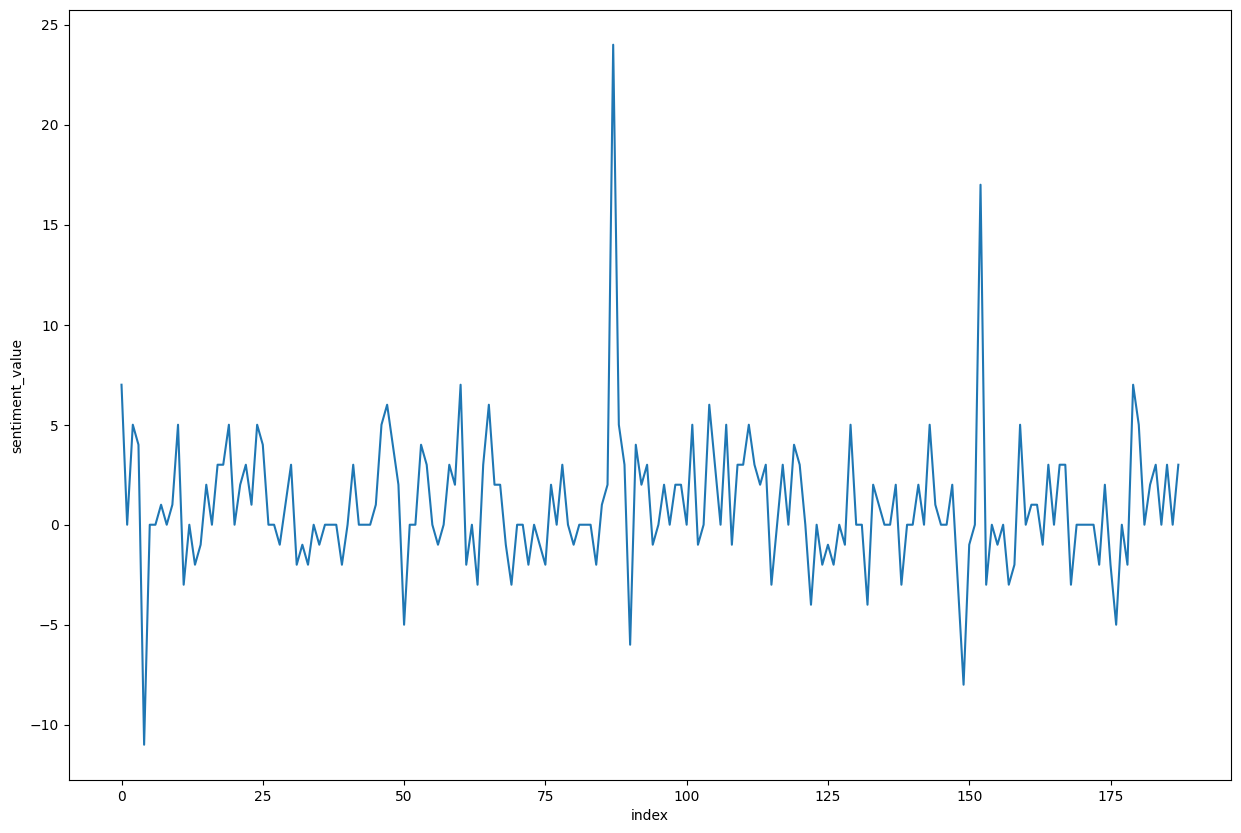

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

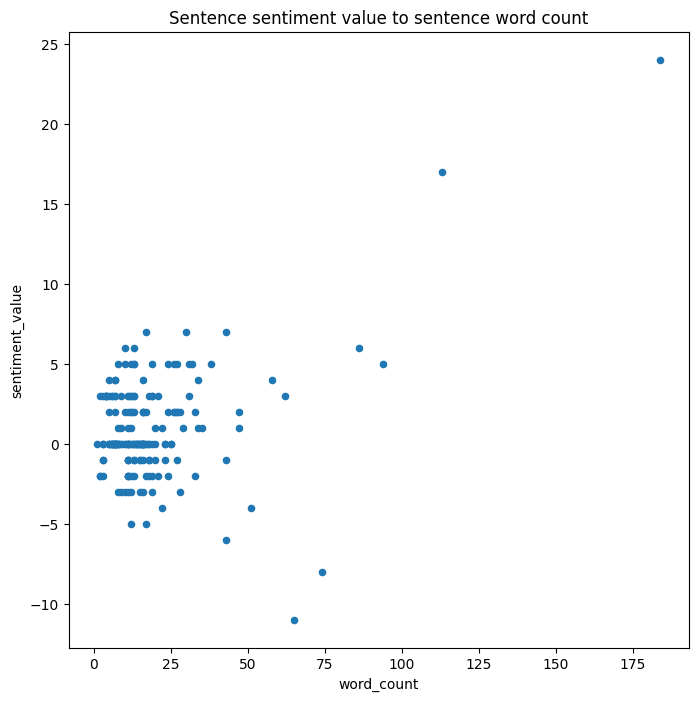

In [ ]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8),
                     title='Sentence sentiment value to sentence word count')